In [1]:
## Importanting the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Importing the Dataset
data=pd.read_csv('heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

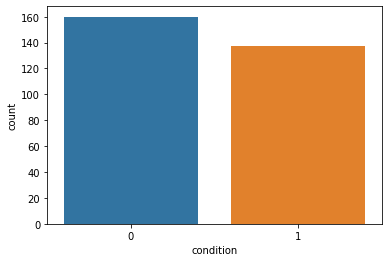

In [7]:
import seaborn as sns
sns.countplot(x='condition', data=data)
plt.show()

In [8]:

# Renaming some of the columns 
data = data.rename(columns={'condition':'target'})

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
data['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

In [11]:
# Let's check if there is any Null value using isnull() method
data.isnull().values.any()

False

In [12]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

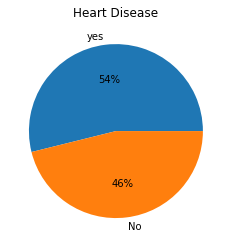

In [13]:

# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = data['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

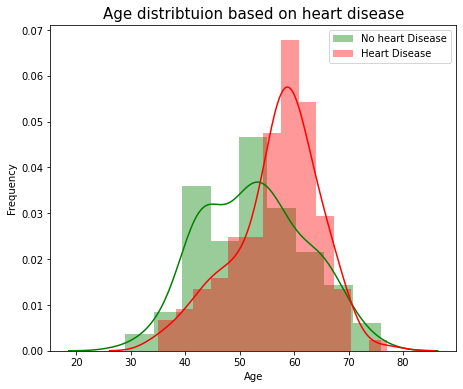

In [14]:

fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(data[data['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(data[data['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [15]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(data[data['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(data[data['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', data[data['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [16]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(data[data['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(data[data['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', data[data['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.75912408759124


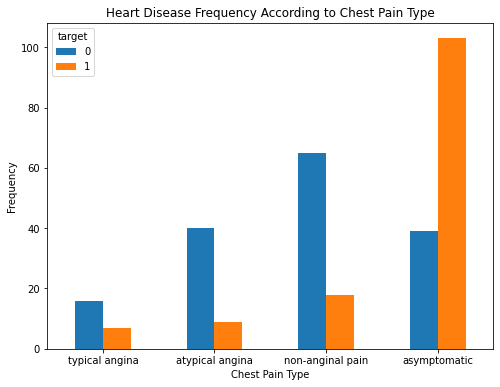

In [17]:

pd.crosstab(data.cp,data.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

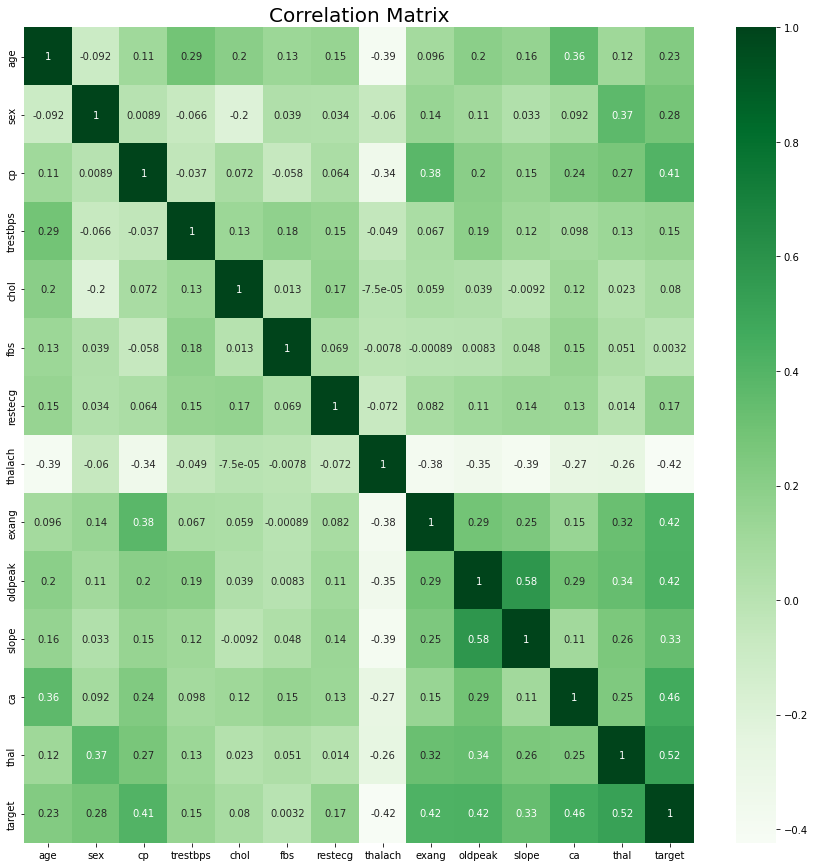

In [18]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(data.corr(), annot = True, cmap = "Greens")
plt.show()

In [19]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= data.drop(columns= 'target')
y= data.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (222, 13), X_test size: (75, 13)


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

In [22]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.7866666666666666

In [23]:
#SVC_model= SVC()
#SVC_model.fit(x_train_scaler, y_train)
#y_pred_SVC= SVC_model.predict(x_test_scaler)
#SVC_model.score(x_test_scaler,y_test)

In [24]:
#Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#Knn_model.fit(x_train_scaler, y_train)
#y_pred_knn= Knn_model.predict(x_test_scaler)
#Knn_model.score(x_test_scaler,y_test)

In [25]:
# creating Logistic Regression Model
#LR_model= LogisticRegression()
#LR_model.fit(x_train_scaler, y_train)
#y_pred_LR= LR_model.predict(x_test_scaler)
#LR_model.score(x_test_scaler,y_test)

In [26]:

print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

cm = confusion_matrix(y_test, y_pred_RF)
print(cm)

# Creating a pickle file for the classifier
filename = 'heart-disease-prediction-model.pkl'
pickle.dump(RF_model, open(filename, 'wb'))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.82      0.73      0.77        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75

Accuracy: 78.67%

[[32  6]
 [10 27]]
